In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [6]:
data_dir = '/content/drive/MyDrive/distracted-driver-detection'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'test')


In [8]:
!pip install split-folders


In [12]:
import splitfolders

# Path to your dataset containing the 'c0', 'c1', ..., 'c9' directories
input_folder = '/content/drive/MyDrive/distracted-driver-detection/train'

# Path to save the split dataset
output_folder = '/content/drive/MyDrive/distracted-driver-detection/split'

# Perform the split with an 80-20 ratio
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None)


Copying files: 22714 files [10:44, 35.24 files/s] 


In [13]:
# Verify the contents of the split directory
!ls '/content/drive/MyDrive/distracted-driver-detection/split/train'
!ls '/content/drive/MyDrive/distracted-driver-detection/split/val'


c0  c1	c2  c3	c4  c5	c6  c7	c8  c9
c0  c1	c2  c3	c4  c5	c6  c7	c8  c9


In [14]:
train_dir = '/content/drive/MyDrive/distracted-driver-detection/split/train'
val_dir = '/content/drive/MyDrive/distracted-driver-detection/split/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 18166 images belonging to 10 classes.
Found 4548 images belonging to 10 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for 10 types of distractions
])


In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/25
567/567 [==============================] - 193s 330ms/step - loss: 2.2598 - accuracy: 0.1451 - val_loss: 1.9424 - val_accuracy: 0.2971
Epoch 2/25
567/567 [==============================] - 173s 305ms/step - loss: 1.9054 - accuracy: 0.2851 - val_loss: 1.4267 - val_accuracy: 0.4696
Epoch 3/25
567/567 [==============================] - 173s 306ms/step - loss: 1.6289 - accuracy: 0.3815 - val_loss: 1.2368 - val_accuracy: 0.5401
Epoch 4/25
567/567 [==============================] - 173s 305ms/step - loss: 1.4476 - accuracy: 0.4529 - val_loss: 1.0146 - val_accuracy: 0.6114
Epoch 5/25
567/567 [==============================] - 173s 305ms/step - loss: 1.2616 - accuracy: 0.5353 - val_loss: 0.7369 - val_accuracy: 0.7386
Epoch 6/25
567/567 [==============================] - 173s 305ms/step - loss: 1.0485 - accuracy: 0.6245 - val_loss: 0.6867 - val_accuracy: 0.7678
Epoch 7/25
567/567 [==============================] - 171s 302ms/step - loss: 0.8928 - accuracy: 0.6876 - val_loss: 0.4900 -

In [19]:
#evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')


143/143 [==============================] - 17s 122ms/step - loss: 0.1435 - accuracy: 0.9584
Validation Loss: 0.1434776782989502
Validation Accuracy: 0.958443284034729


In [20]:
#save the model
model.save('/content/drive/MyDrive/distracted-driver-detection/model/distracted_driver_detection_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 89ms/step


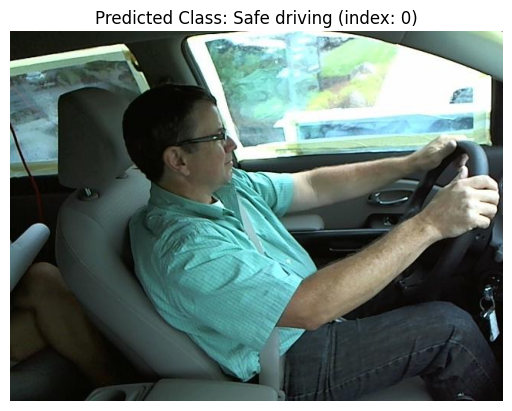

Randomly selected image: /content/drive/MyDrive/distracted-driver-detection/split/val/c0/img_15463.jpg
Predicted Class: Safe driving (index: 0)


In [36]:
# prediction using a random test image
import os
import random
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/MyDrive/distracted-driver-detection/model/distracted_driver_detection_cnn_model.h5')

# Define class labels
class_labels = [
    "Safe driving",          # c0
    "Texting - right",       # c1
    "Talking on the phone - right",  # c2
    "Texting - left",        # c3
    "Talking on the phone - left",   # c4
    "Operating the radio",   # c5
    "Drinking",              # c6
    "Reaching behind",       # c7
    "Hair and makeup",       # c8
    "Talking to passenger"   # c9
]

# Directory containing test images
test_dir = '/content/drive/MyDrive/distracted-driver-detection/split/val'

# Randomly select a class directory and an image from that directory
random_class = random.choice(os.listdir(test_dir))
class_dir = os.path.join(test_dir, random_class)
random_image = random.choice(os.listdir(class_dir))
img_path = os.path.join(class_dir, random_image)

# Load and preprocess the image for prediction
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
predicted_class_label = class_labels[predicted_class_index]

# Display the image and the predicted class label
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted Class: {predicted_class_label} (index: {predicted_class_index})')
plt.axis('off')
plt.show()

print(f'Randomly selected image: {img_path}')
print(f'Predicted Class: {predicted_class_label} (index: {predicted_class_index})')


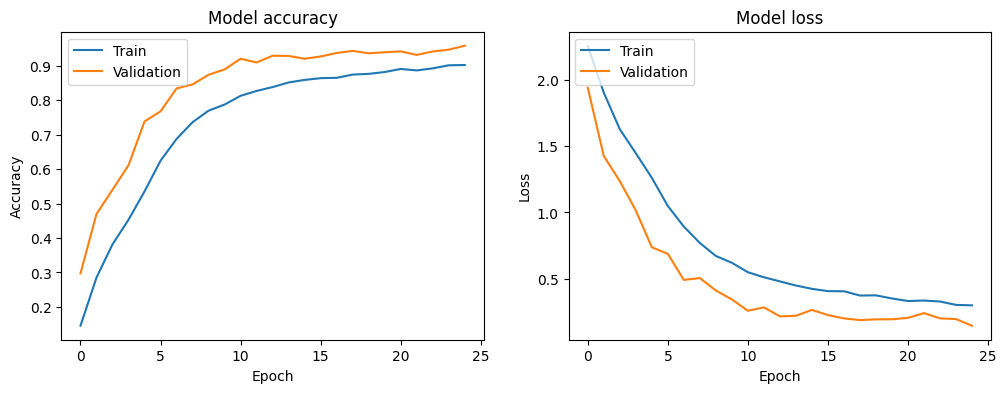

In [33]:
# plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
